## <h3 align="center"> __Johns Hopkins University__</h3>
## <h3 align="center">__Whiting School of Engineering__</h3>
## <h3 align="center">__Engineering for Professionals__</h3>
## <h3 align="center">__685.621 Algorithms for Data Science__</h3>
## <h3 align="center">__Homework 3__</h3>
## <h3 align="center">__Assigned at the start of Module 6__</h3>
## <h3 align="center">__Due at the end of Module 8__</h3><br>
## <h3 align="center">__Total Points 100/100__</h3>
Class, the below is a standard set of instructions for each HW, in this assignment groups will be set up for collaboration.<br><br>
Make sure your group starts one thread for the collaborative problems. You are required to participate in the collaborative problem and subproblem separately. Please do not directly post a complete
solution, the goal is for the group to develop a solution after everyone has participated. Please ensure
you have a write-up with solutions to each problem and subproblems, you are also required to submit
code that will be compiled when grading the assignment. In each of the problems you are allowed to
use built-in functions.

# __1. Module 6 - Note this is not a Collaborative Problem__<br>
*10 Points Total*<br><br>
In this problem the goal is to build a set of numerical images from a set of arrays. The data set
is from the Kaggle web site will be used: https://www.kaggle.com/c/digit-recognizer/data
This data has a training.csv, test.csv and sample submission.csv files. In this exercise the focus
will be on the train.csv data. The web site has the following data description:<br>

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero
through nine.<br>

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each
pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel,
with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.<br>

The training data set, (train.csv), has 785 columns. The first column, called ”label”, is the digit
that was drawn by the user. The rest of the columns contain the pixel-values of the associated
image.<br>

Each pixel column in the training set has a name like pixel x, where x is an integer between
0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as
x = i ∗ 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixel x is located on
row i and column j of a 28 x 28 matrix, (indexing by zero).<br>

For example, pixel 31 indicates the pixel that is in the fourth column from the left, and the second
row from the top, as in the ascii-diagram below.<br>

This data is set up in a csv file which will require the reshaping of the data to be 28 × 28 matrix
representing images. There are 42000 images in the train.csv file. For this problem it is only
necessary to process approximately 100 images, 10 each of the numbers from 0 through 9. The
goal is to learn how to generate features from images using transforms and first order statistics.<br>

1. [5 points] Read-in and store the data in a data structure of your choice so that the data is
reshaped into a matrix of size 28 × 28 which represents each digit as an image.
2. [5 points] Display the images for indices 0, 1, 3, 6, 7, 8, 10, 11, 16, and 21. These indices
represent the numerical values from 0 to 9.

In [3]:
# import additional libraries
import pandas as pd

# import dataset
df = pd.read_csv("train.csv")
df.head()

C:\Users\zhatz\AppData\Local\Temp\ipykernel_3940\3783527670.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
## Type code here for part 1 ##
all_numbers_dict = {}
numbers_dict = {}
indices = [0,1,3,6,7,8,10,11,16,21]
for index, row in df.iterrows():
    label = f"{index}_{row.values[0]}"
    all_numbers_dict[label] = row.values[1:].reshape(28,28)
    if index in indices:
        numbers_dict[row[0]] = row.values[1:].reshape(28,28)

C:\Users\zhatz\AppData\Local\Temp\ipykernel_3940\3898897112.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numbers_dict[row[0]] = row.values[1:].reshape(28,28)


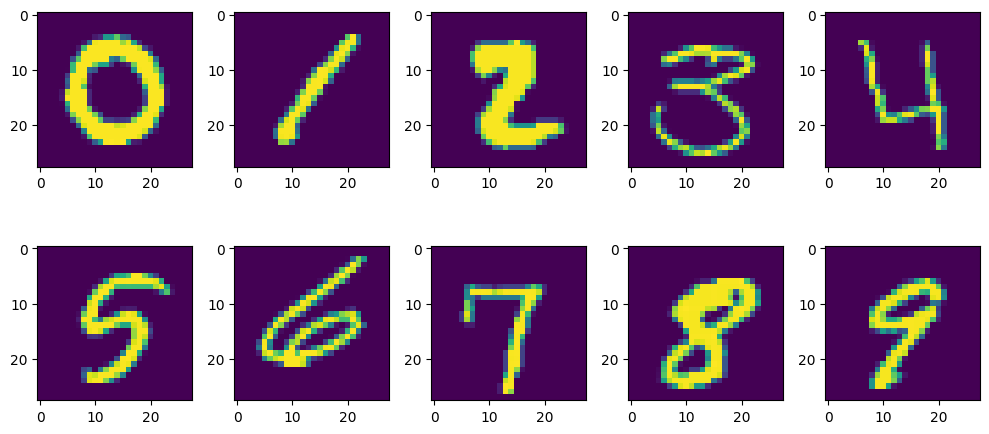

In [5]:
## Type code here for part 2 ##
import matplotlib.pyplot as plt
f, ax = plt.subplots(ncols=5, nrows=2, figsize=(10,5))
for count, axes in enumerate(ax.flatten()):
    axes.imshow(numbers_dict[count])
plt.tight_layout()

# __2. Module 6 - Note this is a Collaborative Problem__<br>
*20 Points Total*<br><br>
In this problem each image from the train.csv (42,000 images in total) is to be processed to generate a set of features using the discrete cosine transform and Eigen decomposition.
1. [5 points] Take the 2 dimensional Discrete Cosine Transform (DCT) of each matrix from
Problem 1, the matrix represents each number (0-9).
2. [2.5 points] Extract the vertical, horizontal and diagonal coefficients from the transform (using the indexes indicated by the masks provided).
3. [5 points] For each of the three sets of DCT coefficients perform Eigen decomposition.
4. [2.5 Points] Retain the top 20 Eigen vectors of each direction.
5. [5 points] Using your top Eigen vectors reduce the DCT transformed data. This will create
a new data set that represents each image as a smaller subset of values.
6. Save the new data in a file of your choice, *.txt, *.csv, etc. The name is up to you (you will use this in the subsequent question).

### FFT and DCT with Inverses Code

In [6]:
from scipy.fftpack import dct, idct

def perform_2d_dct(input_array):
    dct_array = dct(dct(input_array, axis=0, norm='ortho'), axis=1, norm='ortho')
    return dct_array

def perform_inverse_2d_dct(dct_array):
    if dct_array.ndim != 2:
        raise ValueError("Input must be a 2D array")
    inverse_dct_array = idct(idct(dct_array, axis=0, norm='ortho'), axis=1, norm='ortho')
    return inverse_dct_array

In [7]:
import numpy as np
from scipy.fft import fft2, fftshift, ifft2, ifftshift

def perform_2d_fft(input_array):
    fft_array = fftshift(fft2(input_array))
    return fft_array

def perform_inverse_2d_fft(fft_array):
    if fft_array.ndim != 2:
        raise ValueError("Input must be a 2D array")
    inverse_fft_array = ifft2(ifftshift(fft_array))
    #inverse_fft_array = ifft2(fft_array)
    return inverse_fft_array

### DCT Masks

In [8]:
diagMask=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
                   [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
                  ])

vertMask =np.array([[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                  ])
horizMask = np.array([[ 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

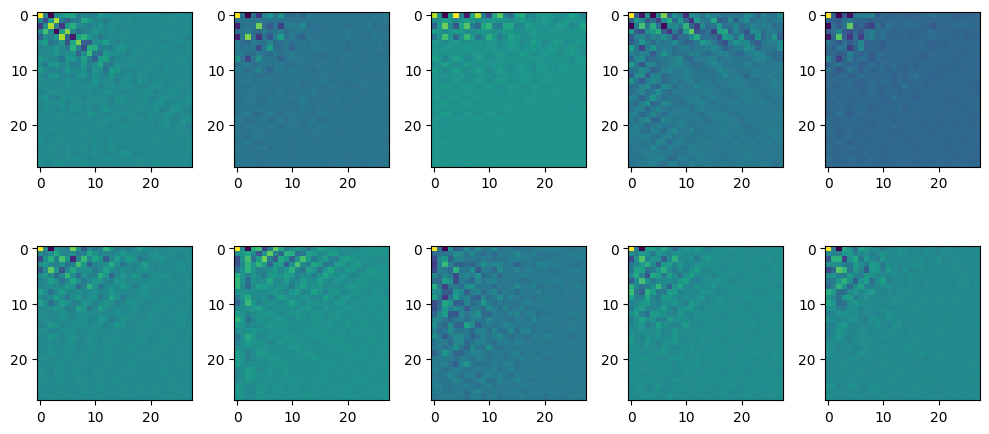

In [9]:
## Type code here for part 1 ##
dct_array = df.iloc[:,1:].values
for count, row in enumerate(dct_array):
    transform = perform_2d_dct(row.reshape(28,28))
    dct_array[count,:] = transform.reshape(1,-1)

f, ax = plt.subplots(ncols=5, nrows=2, figsize=(10,5))
for count, axes in enumerate(ax.flatten()):
    axes.imshow(dct_array[count,:].reshape(28,28))
plt.tight_layout()

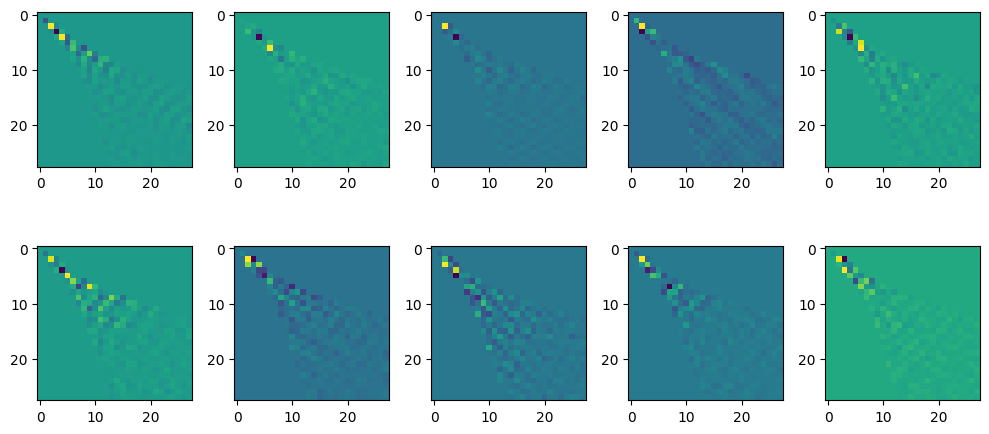

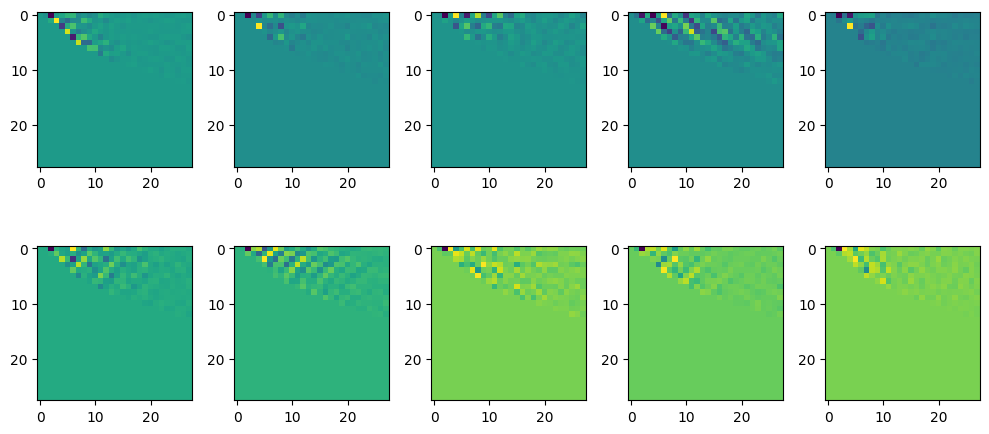

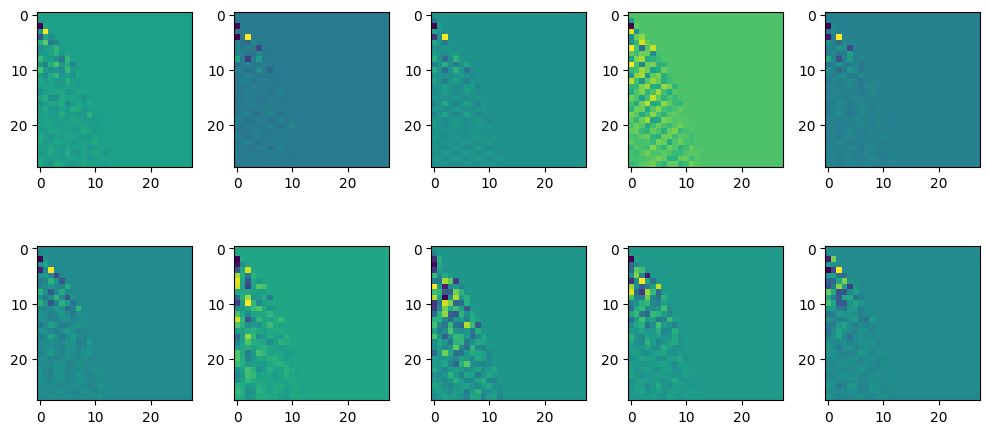

In [10]:
## Type code here for part 2 ##

diag_array = dct_array.copy()
vert_array = dct_array.copy()
hori_array = dct_array.copy()

def mask_data(row, mask):
    masked = row.values.reshape(28,28) * mask
    return masked.reshape(1,-1)

for count, row in enumerate(dct_array):
    diag_array[count, :] = (row.reshape(28,28) * diagMask).reshape(1,-1)
    vert_array[count, :] = (row.reshape(28,28) * vertMask).reshape(1,-1)
    hori_array[count, :] = (row.reshape(28,28) * horizMask).reshape(1,-1)

f, ax = plt.subplots(ncols=5, nrows=2, figsize=(10,5))
for count, axes in enumerate(ax.flatten()):
    axes.imshow(diag_array[count,:].reshape(28,28))
plt.tight_layout()

f2, ax2 = plt.subplots(ncols=5, nrows=2, figsize=(10,5))
for count, axes in enumerate(ax2.flatten()):
    axes.imshow(vert_array[count,:].reshape(28,28))
plt.tight_layout()

f3, ax3 = plt.subplots(ncols=5, nrows=2, figsize=(10,5))
for count, axes in enumerate(ax3.flatten()):
    axes.imshow(hori_array[count,:].reshape(28,28))
plt.tight_layout()

In [131]:
## Type code here for part 3 ##
covD = np.cov(diag_array.T)
_, eigen_diag = np.linalg.eig(covD)

covV = np.cov(vert_array.T)
_, eigen_vert = np.linalg.eig(covV)

covH = np.cov(hori_array.T)
_, eigen_hori = np.linalg.eig(covH)

In [134]:
## Type code here for part 4 ##
eigen_diag_20 = eigen_diag[:,:20]
eigen_vert_20 = eigen_vert[:,:20]
eigen_hori_20 = eigen_hori[:,:20]

In [136]:
## Type code here for part 5 ##
features = np.zeros((42000, 60))
features[:,:20] = np.dot(diag_array,eigen_diag_20)
features[:,20:40] = np.dot(vert_array,eigen_vert_20)
features[:,40:] = np.dot(hori_array,eigen_hori_20)

In [140]:
## Type code here for part 6 ##
np.savetxt("ZH_trainFeatures42k.csv", features, delimiter=",")

# __3. Module 4 Note this is not a Collaborative Problem__<br>
*20 Points Total*<br><br>
In this problem use the developed numerical features from Question 2 (if you are not able to generate the features, they are provided in the module for HW 3). In this problem the following
is to be completed:<br><br>
Use the Fisher’s Linear Discriminant Ratio (FDR) from the Data Processing document, specifically Equation 20.
1. [10 points] For each feature and combination of numbers apply the FDR, e.g., 0 vs 1, 0 vs
2, ..., 0 vs 9, ..., 7 vs 8, 7 vs 9, and 8 vs 9 (which should result in a 60 x 45 matrix where 60 represents the number of features and 45 represents the number of pairwise comparisons).
2. [10 points] Place the results in a table and provide an initial analysis of which feature
provides the best class separation.

In [52]:
# import libraries
from itertools import combinations

# read in the train features data
df_train = pd.read_csv("trainFeatures42k.csv", header=None, index_col=0)
df_train.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,,,,,,,,,,,,,,,,,,,,,
1,538.267964,-314.023125,443.809967,470.780028,176.561668,-336.130920,23.221391,-45.523748,-232.436917,-15.406905,...,-90.463868,107.934027,25.417533,-97.235438,-66.589588,22.468479,-111.476083,62.807185,74.771969,-7.480156
0,-238.730010,224.609513,-197.464121,23.557813,-219.122649,-223.695514,-172.689736,125.561839,-194.150108,-423.697477,...,44.464226,-7.825244,-5.260700,18.905444,9.593545,-40.015688,-96.469679,24.317962,-137.943930,94.025390
1,51.647165,-27.271305,-185.258708,-50.103687,216.830344,-207.152351,60.301310,95.431402,-117.051561,-129.083930,...,-12.722596,-3.039582,-26.963181,-18.563280,16.095458,-81.075489,-42.589100,52.083444,-29.080312,42.344233
4,110.890600,62.854265,-97.528878,-21.291295,297.976619,-32.899732,34.647964,-85.574818,-60.120835,-7.868372,...,23.112458,-62.558569,-115.846264,-16.405413,-37.548852,-269.649782,-130.725868,-23.526366,-20.448849,37.234782
0,-300.296735,152.547221,-91.949199,90.416744,-453.385929,-89.195463,-15.051828,-38.036779,-190.363654,-428.272606,...,-28.107534,30.400739,-47.075128,-13.092383,-85.371052,-141.450375,-36.200100,114.188444,-21.988893,-46.480710


In [147]:
## Type the code for part 1 here ##
fdr_matrix = np.zeros((60, 45))

def FDR(x1, x2):
    u1 = np.mean(x1, axis=0)
    u2 = np.mean(x2, axis=0)
    sig1 = np.std(x1)**2
    sig2 = np.var(x2)**2
    return (u1-u2)**2 / (sig1 + sig2)

for count, comb in enumerate(combinations(range(10),2)):
    col1 = df_train.loc[comb[0], :].values
    col2 = df_train.loc[comb[1], :].values
    fdr_matrix[:,count] = FDR(col1, col2).flatten()

In [17]:
## Type the code for part 2 here ##

 
## Provide code for analysis ##

## Type analysis for part 2 here

## Type response here

# __4. Cross-Validation [2], [7] This is a Collaborative Problem__<br>
*Not covered in lecture notes*<br>
*20 Points Total*<br><br>

In this problem you are to develop and implement a k-fold cross validation algorithm. You are
allowed to use either the Iris data set or the developed numerical features from HW2 to test your
implementation. In this problem the following is to be completed:<br>

1. [5 points] Develop (pseudocode) an algorithm to randomly shuffle input data. Then divide the data into groups of testing and training sets based on the number of desired folds/experiments, the term used will be k-fold cross validation. Use the 5-fold cross validation in Figure 1 as a reference.
2. [5 points] Implement your k-fold cross validation algorithm.
3. [5 points] Test your implementation using the numerical features generated question 2.
4. [5 points] Perform analysis to determine if your implementation is correct. Explain your
method of analysis and conclusions.

In [18]:
%matplotlib inline
from IPython.display import Image
Image('cross_val.png')

FileNotFoundError: No such file or directory: 'cross_val.png'

FileNotFoundError: No such file or directory: 'cross_val.png'

<IPython.core.display.Image object>

# Type your psuedocode for part 1 here #
### You may use this cell in markdown or python code based on your preference ###


In [19]:
## Type response to part 2 here ##


In [20]:
## Type the code for part 3 here ##


In [21]:
## Type your code for part 4 here ##

## Explain your methods for part 4 here

# __5. - Module 8 Note this is a Collaborative Problem - Parzen Window__<br>
*30 Points Total*<br><br>

In this problem the following is to be completed:
1. [10 points] Using your 5-fold cross validation implementation from Problem 4, the Gaussian
kernel in Eq. 27 (Parzen Window) of the Machine Learning document, implement an
algorithm to process training observations and compare with test observations.
2. [10 point] Using all observations and the petal length from the Iris data replicate the subfigures in Figure 2.
3. [10 point] Using all observations, the petal length and the petal width from the Iris data
replicate the subfigures in Figure 3 without contour lines.

In [22]:
Image('gk11d.png')

FileNotFoundError: No such file or directory: 'gk11d.png'

FileNotFoundError: No such file or directory: 'gk11d.png'

<IPython.core.display.Image object>

In [23]:
Image('gk251d.png')

FileNotFoundError: No such file or directory: 'gk251d.png'

FileNotFoundError: No such file or directory: 'gk251d.png'

<IPython.core.display.Image object>

In [24]:
Image('gk51d.png')

FileNotFoundError: No such file or directory: 'gk51d.png'

FileNotFoundError: No such file or directory: 'gk51d.png'

<IPython.core.display.Image object>

In [25]:
Image('gk12d.png')

FileNotFoundError: No such file or directory: 'gk12d.png'

FileNotFoundError: No such file or directory: 'gk12d.png'

<IPython.core.display.Image object>

In [26]:
Image('gk252d.png')

FileNotFoundError: No such file or directory: 'gk252d.png'

FileNotFoundError: No such file or directory: 'gk252d.png'

<IPython.core.display.Image object>

In [27]:
Image('gk52d.png')

FileNotFoundError: No such file or directory: 'gk52d.png'

FileNotFoundError: No such file or directory: 'gk52d.png'

<IPython.core.display.Image object>

In [28]:
## Type the code for part 1 here ##


In [29]:
## Write the code for part 2 here ##

In [30]:
## Write the code for part 3 here ##

# References
[1] Bishop, Christopher M., Neural Networks for pattern Recognition, Oxford University Press,
1995<br><br>
[2] Bishop, Christopher M., Pattern Recognition and Machine Learning, Springer, 2006,
https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognitionand-Machine-Learning-2006.pdf<br><br>
[3] Duin, Robert P.W., Tax, David and Pekalska, Elzbieta, PRTools, http://prtools.tudelft.nl/<br><br>
[4] Franc, Vojtech and Hlavac, Vaclav, Statistical Pattern Recognition Toolbox,
https://cmp.felk.cvut.cz/cmp/software/stprtool/index.html<br><br>
[5] Fukunaga, Keinosuke, Introduction to Statistical Pattern Recognition, Academic Press, 1972<br><br>
[6] Goodfellow, Ian, Bengio, Yoshua, and Courville, Aaron, Deep Learning, MIT Press, 2016,
https://www.deeplearningbook.org/contents/ml.html<br><br>
[7] Russell, S., and Norvig, P., Artificial Intelligence A Modern Approach, 4th Edition, Pearson,
2020<br><br>
[8] Fisher, R.A., The use of Multiple Measurements in Taxonomic Problems, Annals of Human
Genetics, Vol. 7, Issue 2, pp. 179-188, 1936<br><br>
[9] Hotelling, H., Analysis of a complex of statistical variables into principal components, Jour-
nal of Educational Psychology, Number 24, pp. 417–441, 1933<br><br>
[10] Rao, K. P. and Yip, P., Discrete Cosine Transform Algorithms, Advantages, Applications,
San Diego, CA: Academic Press, Inc., 1990